# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

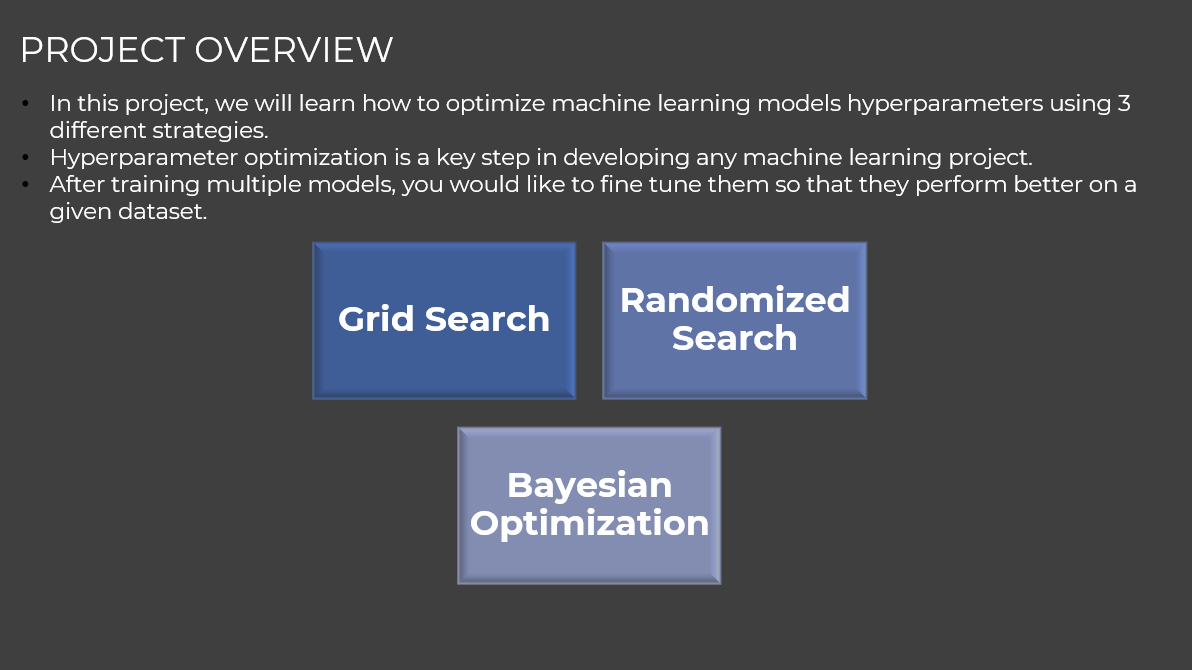

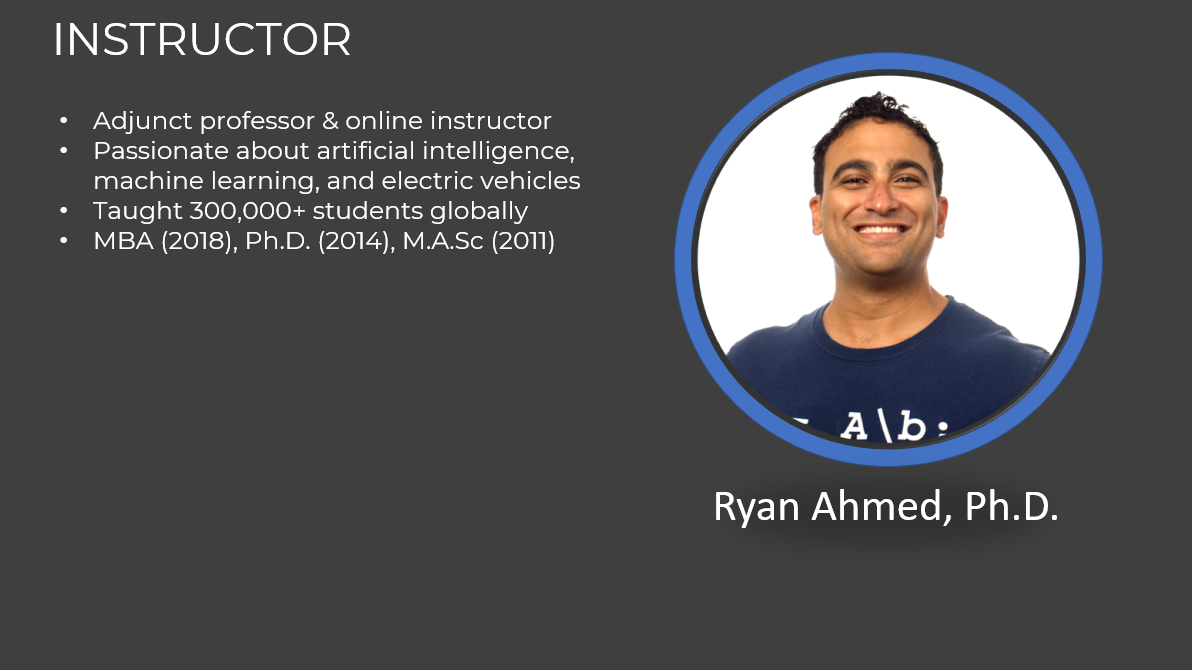

# TASK #2: IMPORT DATASET AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [3]:
# import the csv files using pandas 
df = pd.read_csv('university_admission.csv')

In [4]:
# Let's explore the dataframe
df

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit  
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
..               ...  
495             0.87  
496             0.96  
497             0.93  
498             0.73  
499             0.84  

[500 rows x 8 columns]

In [5]:
df.head(5)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

In [6]:
df.tail(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
490        307          105                  2  2.5   4.5  8.12         1   
491        297           99                  4  3.0   3.5  7.81         0   
492        298          101                  4  2.5   4.5  7.69         1   
493        300           95                  2  3.0   1.5  8.22         1   
494        301           99                  3  2.5   2.0  8.45         1   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit  
490             0.67  
491             0.54  
492             0.53  
493             0.62  
494             0.68  
495             0.87  
496             0.96  
497             0.93  
498             0.73  
499             0.84

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


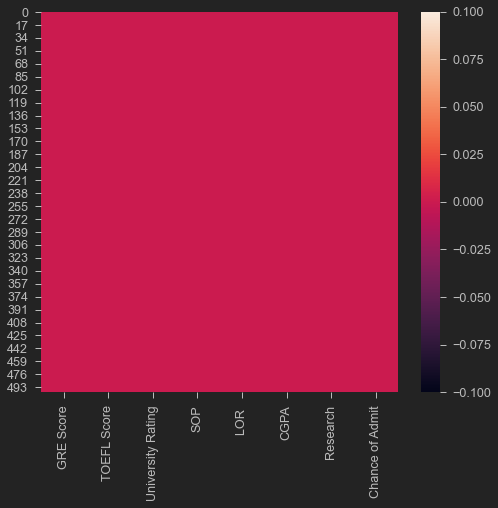

In [8]:
sns.heatmap(df.isnull())

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Calculate the average, minimum and maximum chances of admission using two different techniques** 

# TASK #3: PERFORM DATA VISUALIZATION & PREPARE THE DATA FOR MODEL TRAINING

In [9]:
# The plotly Python package empowers anyone to create, manipulate and render graphical figures.
# The figures are represented by data structures referred to as figures. 
# The rendering process uses the Plotly.js JavaScript library under the hood but you never need to use Java directly. 
# Figures can be represented in Python either as dictionaries or as instances of the plotly.graph_objects

# Note: 
# Plotly Express is the recommended entry-point into the plotly package 
# PLotly Express is the high-level plotly.express module that consists of Python functions which return fully-populated plotly.graph_objects.Figure objects. 
# plotly.express module contains functions that can create interactive figures using a very few lines of code
# Plotly Express is refered to as px. 
# Plotly Express is a built-in part of the plotly library 
# Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance.
# check out the documentation here: https://plotly.com/python/plotly-express/ 

import plotly.express as px

# Let's add a fourth variable "SOP" as the size 
fig = px.scatter(df, x = "GRE Score", y = "Chance of Admit", color = "University Rating", size= 'SOP')
fig.show()

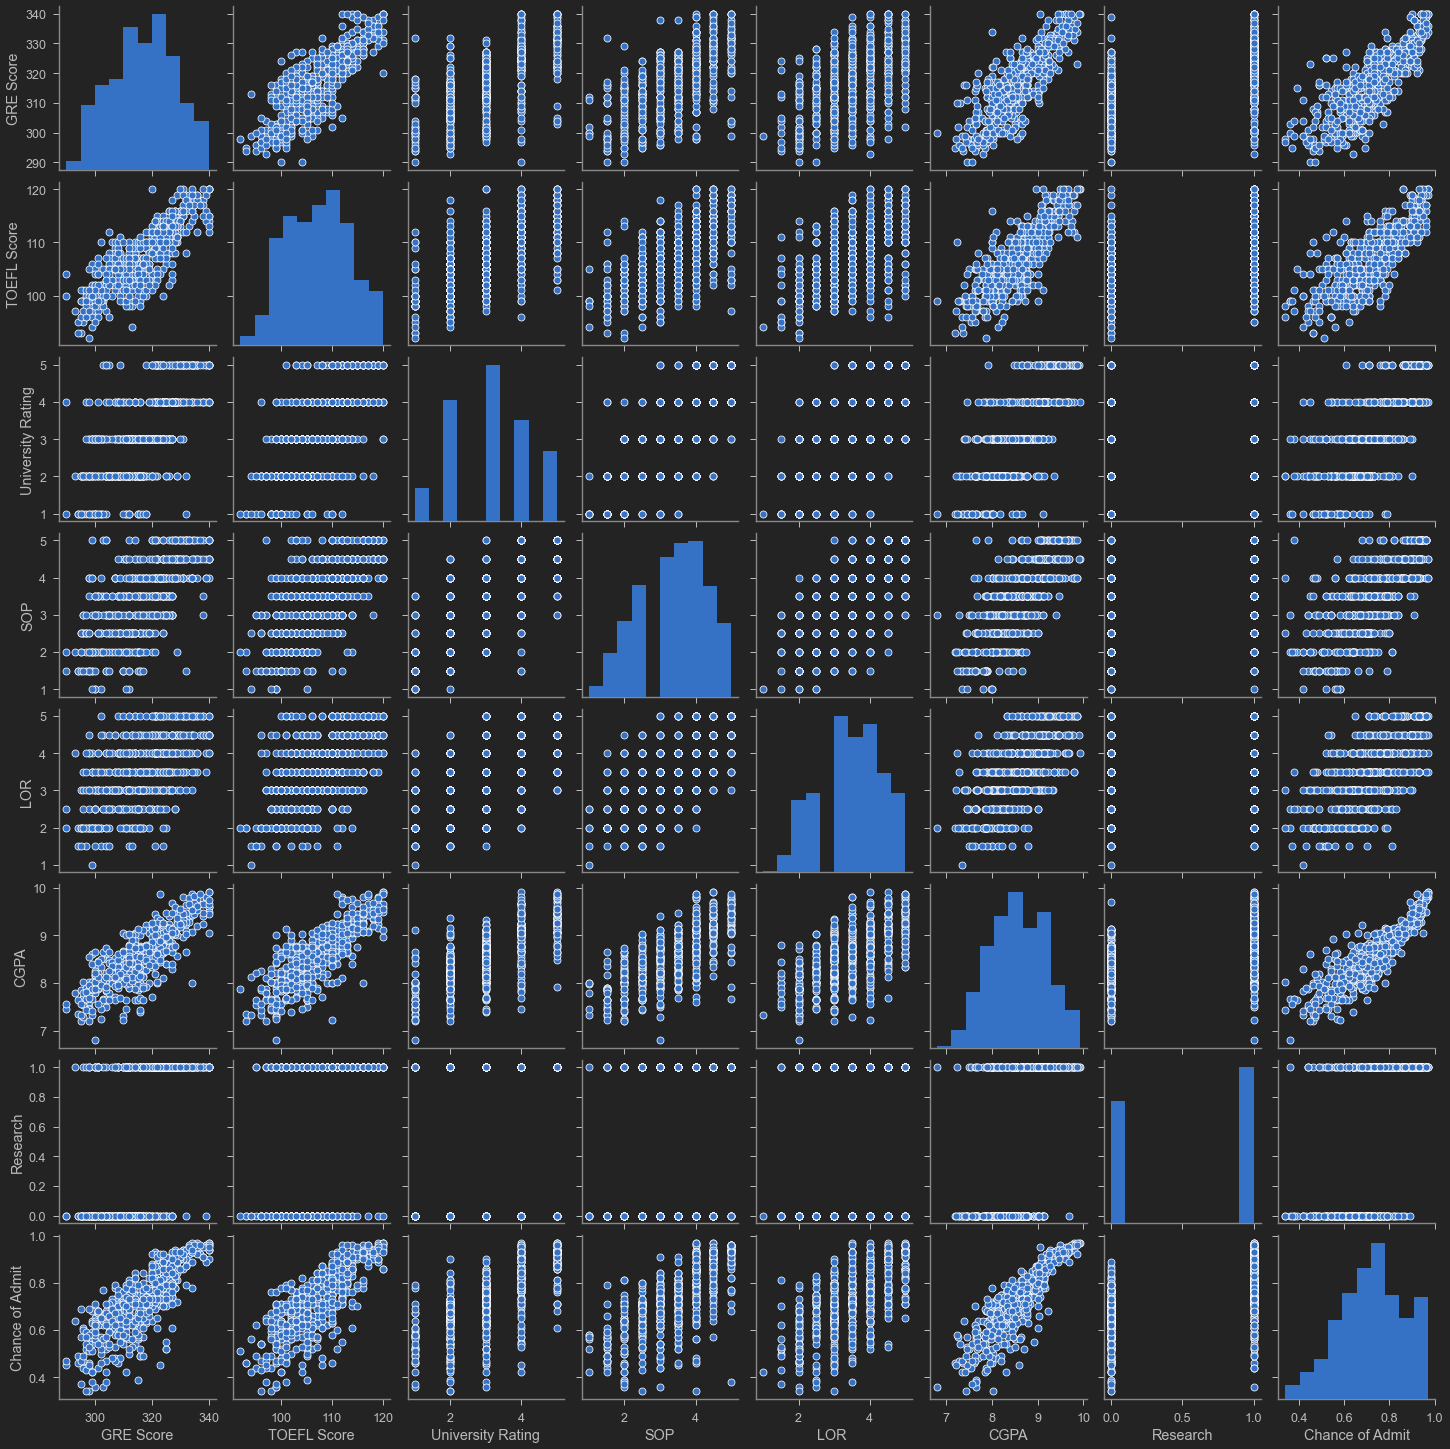

In [10]:
sns.pairplot(df);

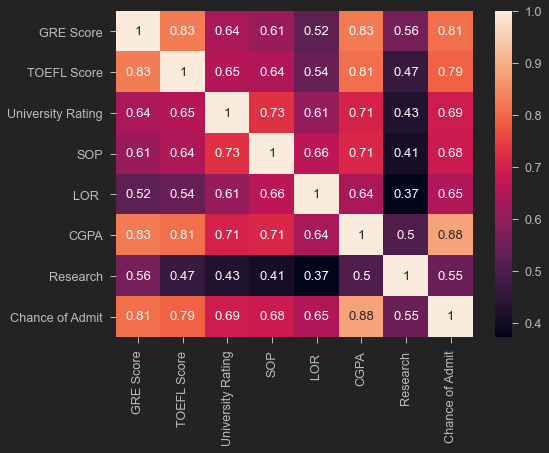

In [11]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True);

In [12]:
y = df['Chance of Admit']

In [13]:
df = df.drop(['Chance of Admit'], axis = 1)

In [14]:
X = df

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
X_train.shape

(400, 7)

In [19]:
X_test.shape

(100, 7)

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Modify the SOP column to make the bubble size variations more prominent** 

# TASK #4: TRAIN AN XG-BOOST ALGORITHM WITHOUT OPTIMIZATION

In [20]:
!pip install xgboost


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Train an XGBoost regressor model 

import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 20, n_estimators = 500)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.6766756102692677


In [23]:
# make predictions on the test data
y_predict = model.predict(X_test)


In [24]:
y_test

222    0.76
260    0.87
194    0.77
69     0.78
14     0.61
       ... 
88     0.64
402    0.78
457    0.37
51     0.56
174    0.87
Name: Chance of Admit, Length: 100, dtype: float64

In [25]:
y_predict

array([0.7548378 , 0.83512145, 0.76264554, 0.9045794 , 0.7115643 ,
       0.7114016 , 0.6288816 , 0.44584972, 0.85379356, 0.8269941 ,
       0.8940743 , 0.5810035 , 0.7310068 , 0.8210705 , 0.91609997,
       0.5001009 , 0.7119818 , 0.5023955 , 0.6564051 , 0.69871813,
       0.6565251 , 0.7087321 , 0.6332159 , 0.7331158 , 0.5450812 ,
       0.44594064, 0.57629156, 0.6286248 , 0.8747663 , 0.7056386 ,
       0.87000835, 0.8274259 , 0.6478504 , 0.75461483, 0.57110685,
       0.8141208 , 0.7294427 , 0.9138929 , 0.7268443 , 0.6286603 ,
       0.70416147, 0.59457827, 0.7843656 , 0.78413314, 0.8200067 ,
       0.5813073 , 0.77134705, 0.89763576, 0.92933404, 0.89014274,
       0.850426  , 0.6825205 , 0.6089002 , 0.68862957, 0.79934305,
       0.5810035 , 0.91222197, 0.67361003, 0.6334678 , 0.92396563,
       0.79285866, 0.7132509 , 0.739559  , 0.7194835 , 0.44778028,
       0.9217101 , 0.79738307, 0.72806835, 0.7203393 , 0.5839523 ,
       0.57532936, 0.7238023 , 0.943126  , 0.6857566 , 0.71439

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.08 
MSE = 0.006387528745398503 
MAE = 0.057921269702911365 
R2 = 0.6766756102692677


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Retrain the model with less 'max_depth' and comment on the results**

# TASK #5: PERFORM HYPERPARAMETERS OPTIMIZATION USING GRIDSEARCH 

- GridSearch performs exhaustive search over a specified list of parameters.
- You provide the algorithm with the hyperparameters you’d like to experiment with and the values we want to try out. 
- Note that you will have the following number of combinations: 3 * 3 * 3 * 2 = 54.
- We will run each combination 5 times since we set the crossvalidation = 5.
- Total number of runs = 54 * 5 = 270 


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters_grid = { 'max_depth': [3, 6, 10], 
                   'learning_rate': [0.01, 0.05, 0.1],
                   'n_estimators': [100, 500, 1000],
                   'colsample_bytree': [0.3, 0.7]}

In [29]:
import xgboost as xgb

In [30]:
model = xgb.XGBRegressor()

In [31]:
# Note that we used the "neg_mean_squared_error" since GridSearchCV() ranks all the algorithms (estimators) 
# and specifies which one is the best. We are trying to minimize the error.  
xgb_gridsearch = GridSearchCV(estimator = model, 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [32]:
xgb_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.013, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.015, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.014, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.014, total=   0.1s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.015, total=   1.0s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.003, total=   0.4s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.003, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=5

[CV]  colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.003, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.003, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=

[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.006, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=1000, score

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.003, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.003, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.004, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.006, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.006, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.004, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, score=-0.005, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=1000, score

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.6min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [33]:
xgb_gridsearch.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [34]:
xgb_gridsearch.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
y_predict = xgb_gridsearch.predict(X_test)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.064 
MSE = 0.004152149836900957 
MAE = 0.04840021494626998 
R2 = 0.7898261807348146


# TASK #6: PERFORM HYPERPARAMETERS OPTIMIZATION USING RANDOM SEARCH 

- Grid search works great if the number of combinations are limited. 
- In scenarios when the search space is large, RandomizedSearchCV is preferred.
- The algorithm works by evaluating a select few numbers of random combinations.
- You have the freedom and control over the number of iterations. 

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Define the grid of hyperparameters to search

# you can choose which booster you'd like to choose: 
# Two options are available: gbtree, gblinear
# gbtree uses tree based models while gblinear uses linear functions

grid = {
    'n_estimators': [100, 500, 700],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.1, 0.5, 1],
    'min_child_weight': [1, 2, 3]  
            }


import xgboost as xgb
model = xgb.XGBRegressor()

# Set up the random search 
random_cv = RandomizedSearchCV(estimator = model,
                               param_distributions = grid,
                               cv = 5, 
                               n_iter = 50,
                               scoring = 'neg_mean_absolute_error',
                               verbose = 5, 
                               return_train_score = True)
random_cv.fit(X_train, y_train)

random_cv.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1, score=(train=-0.001, test=-0.063), total=   0.3s
[CV] n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1, score=(train=-0.001, test=-0.061), total=   0.3s
[CV] n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1, score=(train=-0.001, test=-0.060), total=   0.3s
[CV] n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1, score=(train=-0.001, test=-0.062), total=   0.2s
[CV] n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=1, score=(train=-0.001, test=-0.062), total=   0.2s
[CV] n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1, score=(train=-0.002, test=-0.055), total=   0.6s
[CV] n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1, score=(train=-0.003, test=-0.060), total=   0.4s
[CV] n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1, score=(train=-0.002, test=-0.069), total=   0.4s
[CV] n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1, score=(train=-0.002, test=-0.059), total=   0.4s
[CV] n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=1 
[CV]  n_estimators=7

[CV]  n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.047), total=   0.4s
[CV] n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.046), total=   0.4s
[CV] n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.049), total=   0.4s
[CV] n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.055), total=   0.5s
[CV] n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.5 
[CV]  n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.5, score=(train=-0.001, test=-0.056), total=   1.0s
[CV] n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.5 


[CV]  n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=1, score=(train=-0.004, test=-0.058), total=   0.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.013, test=-0.051), total=   0.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.014, test=-0.045), total=   0.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.013, test=-0.045), total=   0.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.015, test=-0.045), total=   0.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1 
[C

[CV]  n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.5, score=(train=-0.001, test=-0.048), total=   0.1s
[CV] n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.5 
[CV]  n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.5, score=(train=-0.001, test=-0.043), total=   0.1s
[CV] n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.5 
[CV]  n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.5, score=(train=-0.001, test=-0.050), total=   0.1s
[CV] n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.5 
[CV]  n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.5, score=(train=-0.001, test=-0.053), total=   0.1s
[CV] n_estimators=500, min_child_weight=1, max_depth=2, learning_rate=0.5 
[CV]  n_estimators=500, min_child_weight=1, max_depth=2, learning_rate=0.5, score=(train=-0.009, test=-0.059), total=   0.4s
[CV] n_estimators=500, min_child_weight=1, max_depth=2, learning_rate=0.5 


[CV]  n_estimators=700, min_child_weight=1, max_depth=3, learning_rate=1, score=(train=-0.001, test=-0.058), total=   0.3s
[CV] n_estimators=700, min_child_weight=1, max_depth=3, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=1, max_depth=3, learning_rate=1, score=(train=-0.001, test=-0.059), total=   0.2s
[CV] n_estimators=700, min_child_weight=3, max_depth=5, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=3, max_depth=5, learning_rate=1, score=(train=-0.001, test=-0.061), total=   0.3s
[CV] n_estimators=700, min_child_weight=3, max_depth=5, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=3, max_depth=5, learning_rate=1, score=(train=-0.001, test=-0.063), total=   0.2s
[CV] n_estimators=700, min_child_weight=3, max_depth=5, learning_rate=1 
[CV]  n_estimators=700, min_child_weight=3, max_depth=5, learning_rate=1, score=(train=-0.001, test=-0.063), total=   0.3s
[CV] n_estimators=700, min_child_weight=3, max_depth=5, learning_rate=1 
[CV]  n_estimators=7

[CV]  n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.053), total=   0.4s
[CV] n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.047), total=   0.5s
[CV] n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.049), total=   0.5s
[CV] n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.048), total=   0.5s
[CV] n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=700, min_child_weight=2, max_depth=5, learning_rate=0.1, score=(train=-0.002, test=-0.055), total=   0.5s
[CV] n_estimators=100, min_child_weight=2, max_depth=3, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.0min finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_predict = random_cv.predict(X_test)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.064 
MSE = 0.004061054736801419 
MAE = 0.04624500769376755 
R2 = 0.7944372390675635


# TASK #7: PERFORM HYPERPARAMETERS OPTIMIZATION USING BAYESIAN OPTIMIZATION 

- Bayesian optimization overcomes the drawbacks of random search algorithms by exploring search spaces in a more efficient manner. 
- If a region in the search space appears to be promising (i.e.: resulted in a small error), this region should be explored more which increases the chances of achieving better performance! 
- You will need to specify the parameters search space.


In [41]:
# Let's install a library called Scikit-Optimize (Skopt) which is used to perform bayesian optimization 
# BayesSearchCV class is used in a similar fashion to GridSearchCV
# You secify the search space as a distribution instead of discrete values

! pip install scikit-optimize
from skopt import BayesSearchCV
import xgboost as xgb


     ------------------------------------ 100.3/100.3 kB 643.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
model = xgb.XGBRegressor()

In [43]:
search_space = {
    "learning_rate": (0.01, 1.0, "log-uniform"),
    "max_depth": (1, 50),
    "n_estimators": (5, 500),
}

In [44]:
xgb_bayes_search = BayesSearchCV(model, 
                               search_space, 
                               n_iter = 50, 
                               scoring = 'neg_mean_absolute_error', 
                               cv = 5)

In [45]:
result = xgb_bayes_search.fit(X_train, y_train)

In [46]:
y_predict = xgb_bayes_search.predict(X_test)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.067 
MSE = 0.0044787398319759 
MAE = 0.04886828186511992 
R2 = 0.77329482486016


# FINAL CAPSTONE PROJECT

Using the used car prices dataset included in the course package, perform the following:
1. Load the “used_car_price.csv” dataset 
3. Split the data into 75% for training and 25% for testing 
4. Train an XG-Boost model in Scikit-Learn
5. Assess trained XG-Boost model performance using RMSE and R2 
6. Perform hyperparameters optimization using GridSearch, choose any reasonable values for max_depth, learning_rate, n_estimators, and colsample_bytree. Use 5 cross validation folds.  
7. Perform hyperparameters optimization using RandomSearch, choose any reasonable values for max_depth, learning_rate, n_estimators, and colsample_bytree. Use 5 cross validation folds and 100 iterations.  
8. Compare the optimization strategies using RMSE and R2. Feel free to introduce any additional optimization strategy. Comment on your resuk

# FINAL CAPSTONE PROJECT SOLUTION

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Read the CSV file 
car_df = pd.read_csv("used_car_price.csv")

In [50]:
# Load the top 6 instances
car_df.head(6)

Make                    Model   Type Origin DriveTrain   MSRP  EngineSize  \
0  Acura                      MDX    SUV   Asia        All  36945         3.5   
1  Acura           RSX Type S 2dr  Sedan   Asia      Front  23820         2.0   
2  Acura                  TSX 4dr  Sedan   Asia      Front  26990         2.4   
3  Acura                   TL 4dr  Sedan   Asia      Front  33195         3.2   
4  Acura               3.5 RL 4dr  Sedan   Asia      Front  43755         3.5   
5  Acura  3.5 RL w/Navigation 4dr  Sedan   Asia      Front  46100         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0          6         265        17           23    4451        106     189  
1          4         200        24           31    2778        101     172  
2          4         200        22           29    3230        105     183  
3          6         270        20           28    3575        108     186  
4          6         225        18           24    3880        115     197  
5          6         225        18           24    3893        115     197

In [51]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
car_df = pd.get_dummies(car_df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])

In [52]:
# Feeding input features to X and output (MSRP) to y
X = car_df.drop("MSRP", axis = 1)
y = car_df["MSRP"]

In [53]:
X = np.array(X)

In [54]:
y = np.array(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25)

In [62]:
X_train

array([[  3.5,   6. , 200. , ...,   0. ,   1. ,   0. ],
       [  2.2,   4. , 140. , ...,   0. ,   1. ,   0. ],
       [  4.4,   8. , 325. , ...,   0. ,   0. ,   1. ],
       ...,
       [  5. ,   8. , 302. , ...,   0. ,   0. ,   1. ],
       [  4.2,   6. , 275. , ...,   0. ,   1. ,   0. ],
       [  5.7,   8. , 350. , ...,   0. ,   0. ,   1. ]])

In [63]:
X_test

array([[  4.7,   8. , 235. , ...,   1. ,   0. ,   0. ],
       [  3.5,   6. , 255. , ...,   0. ,   1. ,   0. ],
       [  2.2,   4. , 143. , ...,   1. ,   0. ,   0. ],
       ...,
       [  2.5,   6. , 165. , ...,   1. ,   0. ,   0. ],
       [  5. ,   8. , 302. , ...,   1. ,   0. ,   0. ],
       [  1.8,   4. , 124. , ...,   0. ,   1. ,   0. ]])

# 1. XG-BOOST WITHOUT OPTIMIZATION

In [58]:
!pip install xgboost
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 3, n_estimators = 500)
model.fit(X_train, y_train)

# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)
# make predictions on the test data
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 




[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


RMSE = 10199.299 
R2 = 0.6567904163148397


# 2. XG-BOOST WITH GRIDSEARCH

In [59]:
from sklearn.model_selection import GridSearchCV
parameters_grid = { 'max_depth': [3, 10, 20], 
                   'learning_rate': [0.1, 0.5],
                   'n_estimators': [100, 500],
                   'colsample_bytree': [0.3, 0.7]}

model = xgb.XGBRegressor()

# Note that we used the "neg_mean_squared_error" since GridSearchCV() ranks all the algorithms (estimators) 
# and specifies which one is the best. We are trying to minimize the error.  
xgb_gridsearch = GridSearchCV(estimator = model, 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

xgb_gridsearch.fit(X_train, y_train)
y_predict = xgb_gridsearch.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, score=-24583976.234, total=   0.3s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, score=-24956446.385, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, score=-176892170.477, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, score=-60969578.924, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, score=-39737331.650, total=   0.2s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-18750058.380, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-25383111.669, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-161780608.867, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500, score=-55079419.612, total=   1.1s
[CV] colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.1, ma

[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=10, n_estimators=500, score=-210367182.387, total=   2.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=10, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=10, n_estimators=500, score=-80779104.142, total=   4.4s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=10, n_estimators=500 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=10, n_estimators=500, score=-49197913.289, total=   2.5s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=20, n_estimators=100 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=20, n_estimators=100, score=-42669378.431, total=   0.9s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=20, n_estimators=100 
[CV]  colsample_bytree=0.3, learning_rate=0.5, max_depth=20, n_estimators=100, score=-60154894.777, total=   1.0s
[CV] colsample_bytree=0.3, learning_rate=0.5, max_depth=20, n_estimators=100 
[CV]  colsample_bytree=0.3, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100, score=-15538768.148, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100, score=-20044141.421, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100, score=-198782772.521, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100, score=-78017446.904, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=100, score=-45132894.298, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.5, ma

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.2min finished


RMSE = 5326.116 
R2 = 0.9064077253706981


# 3. XG-BOOST WITH RANDOMSEARCH

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of hyperparameters to search

# you can choose which booster you'd like to choose: 
# Two options are available: gbtree, gblinear
# gbtree uses tree based models while gblinear uses linear functions

grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 10, 20],
    'learning_rate': [0.1, 0.5], 
    'colsample_bytree': [0.3, 0.7]}


import xgboost as xgb
model = xgb.XGBRegressor()

# Set up the random search 
random_cv = RandomizedSearchCV(estimator = model,
                               param_distributions = grid,
                               cv = 5, 
                               n_iter = 100,
                               scoring = 'neg_mean_absolute_error',
                               verbose = 5, 
                               return_train_score = True)
random_cv.fit(X_train, y_train)

random_cv.best_estimator_
y_predict = random_cv.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning:

The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-2654.485, test=-3540.728), total=   0.2s
[CV] n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-2407.526, test=-3728.049), total=   0.2s
[CV] n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-2294.669, test=-5399.227), total=   0.2s
[CV] n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-2405.746, test=-4495.576), total=   0.2s
[CV] n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-2320.936, test=-4616.259), total=   1.1s
[CV] n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-1102.788, test=-2991.498), total=   1.1s
[CV] n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-980.757, test=-3581.266), total=   1.1s
[CV] n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-995.300, test=-4985.094), total=   1.1s
[CV] n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=0.3, score=(train=-1053.384, test=-4016.325), total=   1.1s
[CV] n_estimators=500, max_de

[CV]  n_estimators=100, max_depth=10, learning_rate=0.5, colsample_bytree=0.3, score=(train=-13.302, test=-5140.835), total=   0.5s
[CV] n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3, score=(train=-0.001, test=-3500.536), total=   2.5s
[CV] n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3, score=(train=-0.001, test=-4574.010), total=   2.5s
[CV] n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3, score=(train=-0.002, test=-6222.208), total=   2.5s
[CV] n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3 
[CV]  n_estimators=500, max_depth=10, learning_rate=0.5, colsample_bytree=0.3, score=(train=-0.002, test=-6072.631), total=   2.5s
[CV] n_estimators=500, max_depth

[CV]  n_estimators=100, max_depth=20, learning_rate=0.1, colsample_bytree=0.7, score=(train=-28.903, test=-4343.360), total=   1.8s
[CV] n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7 
[CV]  n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7, score=(train=-0.013, test=-3579.155), total=  11.3s
[CV] n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7 
[CV]  n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7, score=(train=-0.013, test=-4474.330), total=  10.7s
[CV] n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7 
[CV]  n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7, score=(train=-0.013, test=-5678.476), total=   9.8s
[CV] n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7 
[CV]  n_estimators=500, max_depth=20, learning_rate=0.1, colsample_bytree=0.7, score=(train=-0.014, test=-4862.072), total=  10.9s
[CV] n_estimators=500, max_depth

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.7min finished


RMSE = 5326.116 
R2 = 0.9064077253706981


# PRACTICE OPPORTUNITIES SOLUTION

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Calculate the average, minimum and maximum chances of admission using two different techniques** 

In [ ]:
df.describe()

In [ ]:
df.max()

In [ ]:
df.min()

In [ ]:
df.mean()

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Modify the SOP column to make the bubble size variations more prominent** 

In [ ]:
df = pd.read_csv('university_admission.csv')

In [ ]:
# Let's square the SOP column
df['SOP'] = df['SOP'] ** 2

# Let's add a fourth variable "SOP" as the size 
fig = px.scatter(df, x = "GRE Score", y = "Chance of Admit", color = "University Rating", size= 'SOP')
fig.show()

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Retrain the model with less 'max_depth'**
- **Comment on the results**

In [ ]:
# Train an XGBoost regressor model 

import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 3, n_estimators = 500)

model.fit(X_train, y_train)